In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_csv('auto.csv', header=0)
#Getting first column series when no name is as header
df

,Unnamed: 0,Unnamed: 1,brand,engine-type,trans,Unnamed: 5,body-style,drive-wheels,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [89]:
df.describe()

,Unnamed: 0,Unnamed: 9,engine-size,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 16,Unnamed: 20,Unnamed: 23,Unnamed: 24,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13071.039024
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7972.900321
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,1600.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7738.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10245.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [90]:
drive_wheels_count = df['drive-wheels'].value_counts()
drive_wheels_count.rename({'drive-wheels':'value_counts'}, inplace = True)
drive_wheels_count.index.name='drive-wheels'
drive_wheels_count

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

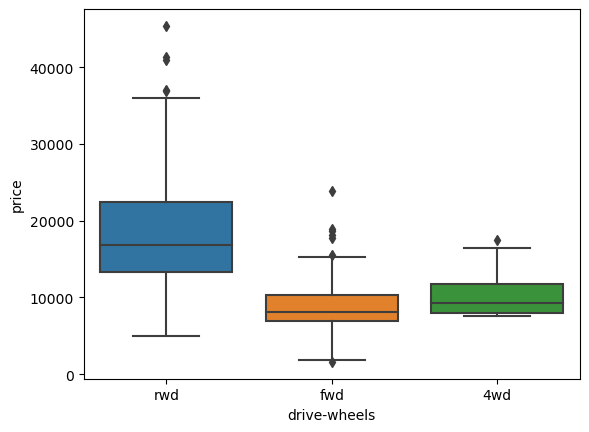

In [91]:
sns.boxplot(x='drive-wheels' , y='price', data = df)

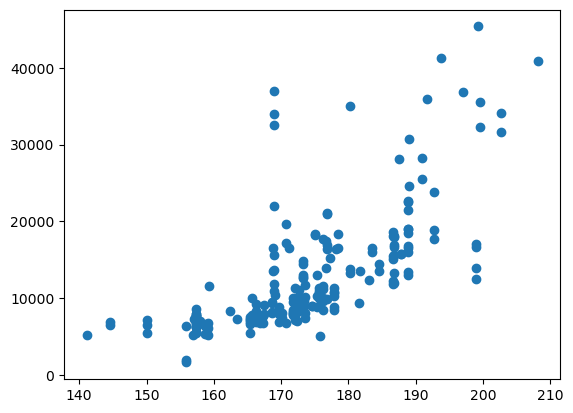

In [92]:
x=df["engine-size"]
y=df['price']
plt.scatter(x,y)

In [93]:
df_test = df[["drive-wheels", 'body-style', 'price']]
df_group = df_test.groupby(["drive-wheels", 'body-style'], as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,12016.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9528.929825
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [94]:
df_pivot = df_group.pivot(index= 'drive-wheels', columns = 'body-style') 
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  12016.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9528.929825   
rwd              23949.6  24202.714286  13846.315789  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

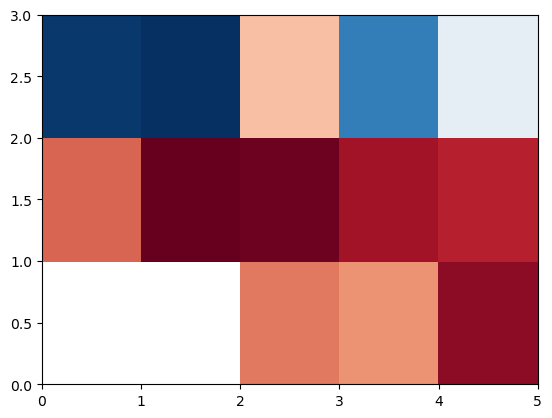

In [95]:
plt.pcolor(df_pivot, cmap ='RdBu')
plt.colorbar
plt.show()

In [96]:
from sklearn.feature_selection import f_oneway
from scipy import stats


df_anova = df[["brand", 'price']]
group_anova = df_anova.groupby(['brand'])
anova_results_l = stats.f_oneway(group_anova.get_group("honda")["price"], group_anova.get_group("subaru")["price"])
anova_results_l

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

(0.0, 47872.984910471285)

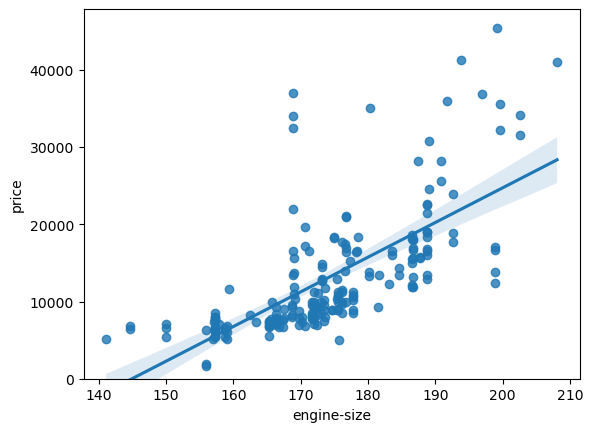

In [97]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0)

In [102]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(pearson_coef)
print(p_value)

0.6947826801184387
7.022158215617409e-31
